In [1]:
import sys
sys.path.append('..') 

In [2]:
# load data
from utils import load_train_val_data, load_test_data

X_train, X_val, y_train, y_val = load_train_val_data()
X_test, y_test = load_test_data()

📥 Loading train/val data...
✅ Data loaded:
   X_train: (3000, 5000)
   X_val: (1200, 5000)
   y_train: 3000 samples
   y_val: 1200 samples
🚨 Loading TEST data - use only for final evaluation!
✅ Test data loaded:
   X_test: (300, 5000)
   y_test: 300 samples


In [3]:
# initialize trainer
from utils import ModelTrainer

trainer = ModelTrainer(
    cv_folds=5,       
    scoring='accuracy',
    n_trials=75,      
    random_state=42,
    verbose=True
)

In [4]:
from utils import ModelEvaluator

evaluator = ModelEvaluator()

# Feature Selection Test

No need to run this again unless trying to test other feature extractors. Results from previous experiments are saved. Skip to Model Training and Evaluation

In [25]:
# QUICK FEATURE SELECTION TEST - Add this cell instead for faster results

from models import RandomForestModel
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

print("⚡ QUICK FEATURE SELECTION TEST")
print("=" * 40)

techniques = [
    # Chi-squared: THE classic for text classification
    ("Chi2_500", SelectKBest(chi2, k=500)),
    ("Chi2_750", SelectKBest(chi2, k=750)),
    ("Chi2_1000", SelectKBest(chi2, k=1000)),
    ("Chi2_1500", SelectKBest(chi2, k=1500)),
    
    # Mutual Information: Captures complex term relationships
    ("MutualInfo_500", SelectKBest(mutual_info_classif, k=500)),
    ("MutualInfo_750", SelectKBest(mutual_info_classif, k=750)),
    ("MutualInfo_1000", SelectKBest(mutual_info_classif, k=1000)),

    # Statistical selection - likely to work well with TF-IDF
    ("F-Score_500", SelectKBest(f_classif, k=500)),
    ("F-Score_1000", SelectKBest(f_classif, k=1000)),
    ("F-Score_1500", SelectKBest(f_classif, k=1500)),


    # RF importance - uses same algorithm as your model
    ("RF_Import_1000", SelectFromModel(
        RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1), 
        max_features=1000)
    )
]
    

results = []

for name, selector in techniques:
    print(f"\n🧪 Testing {name}...")
    
    # Select features
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_val_sel = selector.transform(X_val)
    X_test_sel = selector.transform(X_test)
    n_features = X_train_sel.shape[1]
    
    print(f"   Selected: {n_features} features ({n_features/X_train.shape[1]*100:.1f}%)")
    
    # Quick test with simple RF
    rf_test = RandomForestModel(n_estimators=167, max_depth=10, min_samples_split = 24, min_samples_leaf = 8, max_features = 0.6, random_state=42)
    rf_test.name = f"Test_{name}"
    
    test_results = trainer.train_model(
        model=rf_test,
        X_train=X_train_sel,
        y_train=y_train, 
        X_val=X_val_sel,
        y_val=y_val,
        optimize=False
    )
    
    val_acc = test_results['val_accuracy']
    print(f"   🎯 Val accuracy: {val_acc:.4f}")
    
    results.append({
        'name': name,
        'n_features': n_features,
        'val_acc': val_acc,
        'selector': selector,
        'X_train_sel': X_train_sel,
        'X_val_sel': X_val_sel,
        'X_test_sel': X_test_sel
    })

# Find best result
best = max(results, key=lambda x: x['val_acc'])
print(f"\n🏆 BEST QUICK TEST: {best['name']}")
print(f"   Features: {best['n_features']}")
print(f"   Accuracy: {best['val_acc']:.4f}")

⚡ QUICK FEATURE SELECTION TEST

🧪 Testing Chi2_500...
   Selected: 500 features (10.0%)
🚀 Training Test_Chi2_500...
🔧 Fitting Test_Chi2_500...
✅ Test_Chi2_500 fitted in 4.40 seconds
🔄 Running 5-fold cross-validation...
✅ Test_Chi2_500 completed in 8.6s
   CV: 0.5760 ± 0.0204
   Train: 0.7050
   Val: 0.5758 (gap: 0.1292)
   🎯 Val accuracy: 0.5758

🧪 Testing Chi2_750...
   Selected: 750 features (15.0%)
🚀 Training Test_Chi2_750...
🔧 Fitting Test_Chi2_750...
✅ Test_Chi2_750 fitted in 6.69 seconds
🔄 Running 5-fold cross-validation...
✅ Test_Chi2_750 completed in 12.8s
   CV: 0.5783 ± 0.0242
   Train: 0.7287
   Val: 0.5875 (gap: 0.1412)
   🎯 Val accuracy: 0.5875

🧪 Testing Chi2_1000...
   Selected: 1000 features (20.0%)
🚀 Training Test_Chi2_1000...
🔧 Fitting Test_Chi2_1000...
✅ Test_Chi2_1000 fitted in 9.35 seconds
🔄 Running 5-fold cross-validation...
✅ Test_Chi2_1000 completed in 17.6s
   CV: 0.5817 ± 0.0180
   Train: 0.7463
   Val: 0.5842 (gap: 0.1622)
   🎯 Val accuracy: 0.5842

🧪 Testing

/home/maveron/.conda/envs/304/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/maveron/.conda/envs/304/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/maveron/.conda/envs/304/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/maveron/.conda/envs/304/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label,

   Selected: 500 features (10.0%)
🚀 Training Test_MutualInfo_500...
🔧 Fitting Test_MutualInfo_500...
✅ Test_MutualInfo_500 fitted in 30.01 seconds
🔄 Running 5-fold cross-validation...
✅ Test_MutualInfo_500 completed in 54.5s
   CV: 0.5837 ± 0.0188
   Train: 0.8977
   Val: 0.6233 (gap: 0.2743)
   🎯 Val accuracy: 0.6233

🧪 Testing MutualInfo_750...


/home/maveron/.conda/envs/304/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/maveron/.conda/envs/304/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/maveron/.conda/envs/304/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/maveron/.conda/envs/304/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label,

   Selected: 750 features (15.0%)
🚀 Training Test_MutualInfo_750...
🔧 Fitting Test_MutualInfo_750...
✅ Test_MutualInfo_750 fitted in 36.82 seconds
🔄 Running 5-fold cross-validation...
✅ Test_MutualInfo_750 completed in 66.8s
   CV: 0.5807 ± 0.0180
   Train: 0.8997
   Val: 0.6058 (gap: 0.2938)
   🎯 Val accuracy: 0.6058

🧪 Testing MutualInfo_1000...


/home/maveron/.conda/envs/304/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/maveron/.conda/envs/304/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/maveron/.conda/envs/304/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/maveron/.conda/envs/304/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label,

   Selected: 1000 features (20.0%)
🚀 Training Test_MutualInfo_1000...
🔧 Fitting Test_MutualInfo_1000...
✅ Test_MutualInfo_1000 fitted in 42.02 seconds
🔄 Running 5-fold cross-validation...
✅ Test_MutualInfo_1000 completed in 76.4s
   CV: 0.5770 ± 0.0269
   Train: 0.8883
   Val: 0.6108 (gap: 0.2775)
   🎯 Val accuracy: 0.6108

🧪 Testing F-Score_500...
   Selected: 500 features (10.0%)
🚀 Training Test_F-Score_500...
🔧 Fitting Test_F-Score_500...
✅ Test_F-Score_500 fitted in 8.06 seconds
🔄 Running 5-fold cross-validation...
✅ Test_F-Score_500 completed in 14.8s
   CV: 0.5763 ± 0.0204
   Train: 0.7520
   Val: 0.5900 (gap: 0.1620)
   🎯 Val accuracy: 0.5900

🧪 Testing F-Score_1000...
   Selected: 1000 features (20.0%)
🚀 Training Test_F-Score_1000...
🔧 Fitting Test_F-Score_1000...
✅ Test_F-Score_1000 fitted in 16.21 seconds
🔄 Running 5-fold cross-validation...
✅ Test_F-Score_1000 completed in 29.7s
   CV: 0.5760 ± 0.0210
   Train: 0.7857
   Val: 0.5958 (gap: 0.1898)
   🎯 Val accuracy: 0.5958

🧪

In [27]:
import pickle
import os

# Create directory if it doesn't exist
data_path = "../data/processed/feature_extracted/"
os.makedirs(data_path, exist_ok=True)

file_name = f"extracted_features"

# Save best results
with open(f'{data_path}{file_name}.pkl', 'wb') as f:
    pickle.dump({
        'best': best,
        'all_results': results
    }, f)
    
print(f"💾 Results saved to {file_name}.pkl")

💾 Results saved to extracted_features.pkl


# Model Training

## Load Features

Load best extracted features from file. Run this first

In [5]:
import pickle
def load_best_features(filename='best_feature_results.pkl'):
   with open(filename, 'rb') as f:
       data = pickle.load(f)
   
   best = data['best']
   all_results = data['all_results']
   
   print(f"📁 Loaded: {best['name']} - {best['val_acc']:.4f} accuracy")
   print(f"   Features: {best['n_features']}")
   
   return best, all_results

# Create directory if it doesn't exist
data_path = "../data/processed/feature_extracted/"

file_name = f"extracted_features"
best, all_results = load_best_features(filename=f"{data_path}{file_name}.pkl")

selector_name = best["name"]
X_train = best['X_train_sel']
X_val = best['X_val_sel']
X_test = best['X_test_sel']


📁 Loaded: MutualInfo_500 - 0.6233 accuracy
   Features: 500


## Training and Evaluation functions

In [6]:
# Training function to standardise outputs for all experiments

def train(model, model_name, trainer, X_train, y_train, X_val, y_val, optimize = True, param_space=None):
    
    model.name = model_name

    print(f"🎯 Training {model_name} with Bayesian Optimization...")
    print(f"   Features: {best['X_train_sel'].shape[1]} (chi-squared selected)")
    print(f"   Parameter space: {len(param_space)} hyperparameters" if param_space is not None else "   default")
    print(f"   Optimization trials: {trainer.n_trials}")

    # Train with comprehensive hyperparameter optimization
    training_results = trainer.train_model(
        model=model,
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        param_space=param_space,
        optimize=optimize 
    )

    print(f"\n🔍 {model_name} Training Results:")
    if training_results['optimization']:
        opt = training_results['optimization']
        print(f"   Optimization completed: {opt['n_trials']} trials in {opt['optimization_time']:.1f}s")
        print(f"   Best CV Score: {opt['best_score']:.4f}")
        print(f"   Best Parameters: {opt['best_params']}")

    print(f"   Final CV Score: {training_results['cv_mean']:.4f} ± {training_results['cv_std']:.4f}")
    print(f"   Train Accuracy: {training_results['train_accuracy']:.4f}")
    print(f"   Val Accuracy: {training_results['val_accuracy']:.4f}")
    print(f"   Overfitting Gap: {training_results['train_accuracy'] - training_results['val_accuracy']:.4f}")

    return training_results

In [7]:
# evaluation function to standardise model evaluation

def evaluate(model, model_name, evaluator, X_train, y_train, X_val, y_val, X_test, y_test):

    # Comprehensive evaluation with test set
    print(f"\n📊 Running comprehensive evaluation...")
    eval_results = evaluator.evaluate_model(
        model=model,
        X_train=X_train,
        y_train=y_train,
        X_val=X_val, 
        y_val=y_val,
        X_test=X_test,
        y_test=y_test,
        model_name=model_name
    )

    # Print detailed evaluation report
    evaluator.print_detailed_report(model_name)

    # Plot overfitting analysis across models
    evaluator.plot_overfitting_analysis()

    # Plot confusion matrix
    evaluator.plot_confusion_matrix(model_name)

    return eval_results

In [8]:
import os
import pickle

# save experiment function to standardise experiment saving
experiment_path = "../models/trained/RandomForest/"

def save_experiment(data, filename, dir=experiment_path):
    os.makedirs(dir, exist_ok=True)  
    with open(f"{dir}{filename}", "wb") as file:
        pickle.dump(data, file)
    print(f"Experiment saved to {dir}{filename}")
    


## Baseline Model

Uses default random forest classifier settings as baseline

### Baseline Training


In [9]:
from models import RandomForestModel

# Create baseline RandomForest with default parameters
baseline_rf = RandomForestModel(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    max_features='sqrt',
    random_state=42
)

baseline_rf_name = f"Baseline_RF_{selector_name}"

baseline_train_results = train(model = baseline_rf, 
      model_name = baseline_rf_name, 
      trainer = trainer,
      X_train = X_train, 
      y_train = y_train, 
      X_val = X_val, 
      y_val = y_val, 
      optimize = False)

🎯 Training Baseline_RF_MutualInfo_500 with Bayesian Optimization...
   Features: 500 (chi-squared selected)
   default
   Optimization trials: 75
🚀 Training Baseline_RF_MutualInfo_500...
🔧 Fitting Baseline_RF_MutualInfo_500...
✅ Baseline_RF_MutualInfo_500 fitted in 3.87 seconds
🔄 Running 5-fold cross-validation...
✅ Baseline_RF_MutualInfo_500 completed in 8.5s
   CV: 0.5403 ± 0.0196
   Train: 0.9997
   Val: 0.5850 (gap: 0.4147)

🔍 Baseline_RF_MutualInfo_500 Training Results:
   Final CV Score: 0.5403 ± 0.0196
   Train Accuracy: 0.9997
   Val Accuracy: 0.5850
   Overfitting Gap: 0.4147


### Baseline Evaluation


📊 Running comprehensive evaluation...
📊 Evaluating Baseline_RF_MutualInfo_500...
✅ Evaluation completed for Baseline_RF_MutualInfo_500
   Train Acc: 0.9997, F1: 0.9997
   Val Acc: 0.5850, F1: 0.5832 (max gap: 0.4165)
   Test Acc: 0.4867, F1: 0.4856

📋 DETAILED EVALUATION REPORT: Baseline_RF_MutualInfo_500
📊 PERFORMANCE SUMMARY:
   TRAIN : Acc=0.9997, F1-W=0.9997, F1-M=0.9997
   VAL   : Acc=0.5850, F1-W=0.5832, F1-M=0.5832
   TEST  : Acc=0.4867, F1-W=0.4856, F1-M=0.4856

⚠️  OVERFITTING ANALYSIS:
   Severity: severe
   Max Gap: 0.4165
   accuracy_gap: 0.4147
   f1_weighted_gap: 0.4165

🎯 PER-CLASS PERFORMANCE (Test Set):
   Good Fit    : F1=0.4227, P=0.4362, R=0.4100
   No Fit      : F1=0.5686, P=0.5577, R=0.5800
   Potential Fit: F1=0.4653, P=0.4608, R=0.4700

🔍 FEATURE IMPORTANCE (tree_importance):
   Top 5 indices: [253   0 259   4  85]
   Mean importance: 0.0020
   Std importance: 0.0008

📊 CLASSIFICATION REPORT SUMMARY:
   Macro Avg: F1=0.4856, P=0.4849, R=0.4867
   Weighted Avg: 

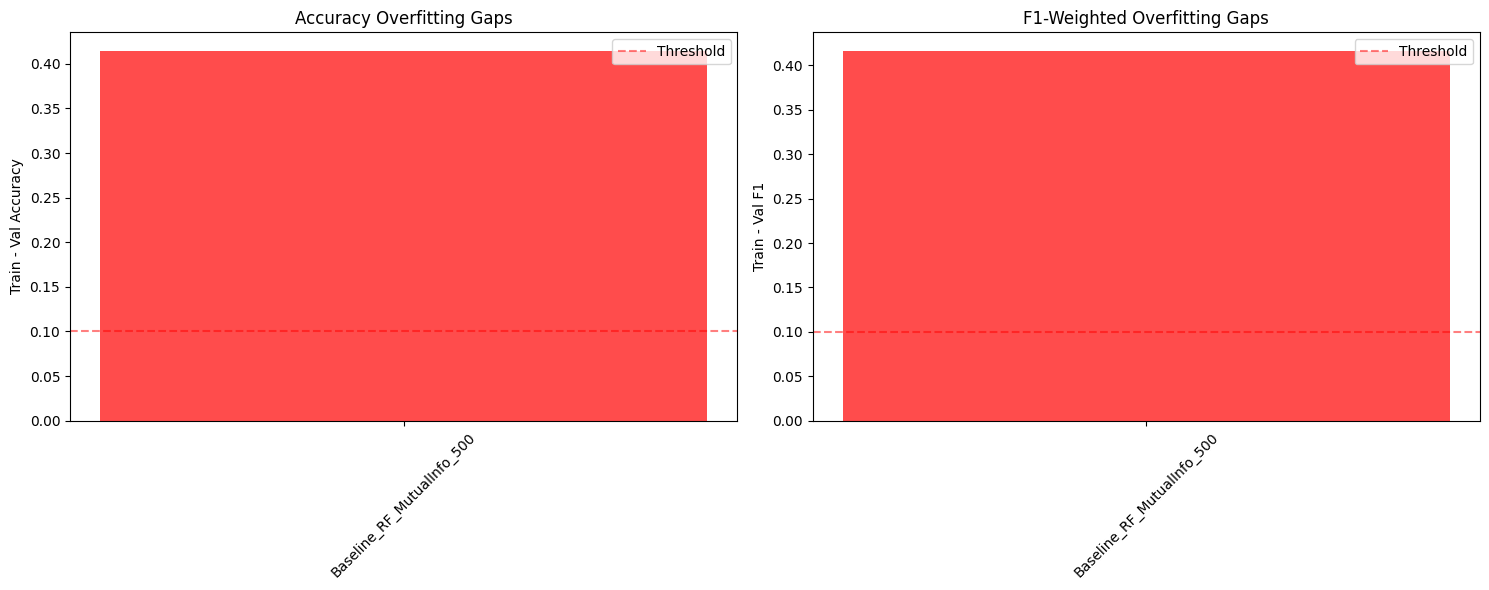

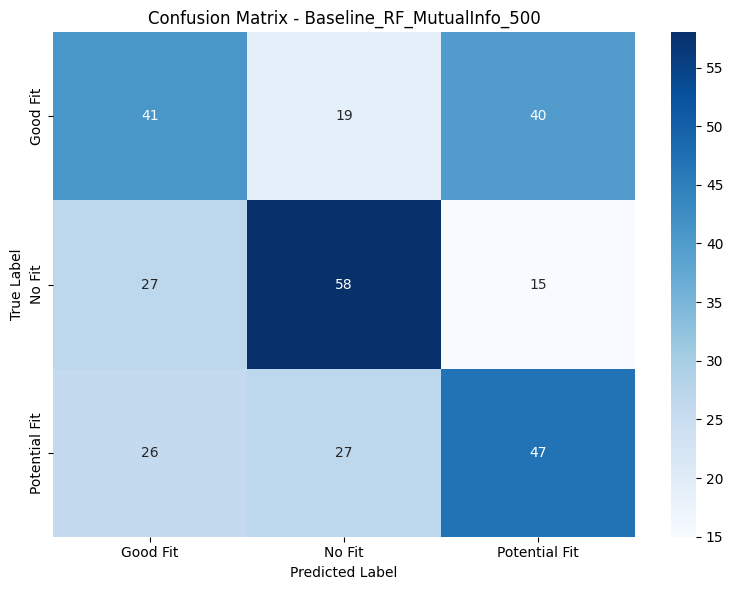

Experiment saved to ../models/trained/RandomForest/Baseline_RF_MutualInfo_500.pkl


In [10]:

# evaluation function to standardise model evaluation
baseline_eval_results = evaluate(
    model = baseline_rf,
    model_name = baseline_rf_name,
    evaluator = evaluator,
    X_train = X_train,
    y_train = y_train,
    X_val = X_val,
    y_val = y_val,
    X_test = X_test,
    y_test = y_test
)

experiment_name = baseline_rf_name

baseline_experiment = {
    "experiment_name" : experiment_name,
    "model" : baseline_rf,
    "train_results" : baseline_train_results,
    "eval_results" : baseline_eval_results
}

save_experiment(baseline_experiment, f"{experiment_name}.pkl")

## Low Train-Val Gap

### Anti Overfit Traning 

In [20]:
# ENHANCED VERSION with additional anti-overfitting parameters
anti_overfit_space = {
    # Core tree parameters (your original)
    'n_estimators': (200, 500),
    'max_depth': (3, 8),
    'min_samples_split': (20, 100),
    'min_samples_leaf': (15, 50),
    'max_features': ['sqrt', 'log2', 0.2, 0.3, 0.4],
    'max_samples': (0.6, 0.9),
    'min_impurity_decrease': (0.0, 0.01), 
    'min_weight_fraction_leaf': (0.0, 0.05),
    'ccp_alpha': (0.0, 0.1),
    'bootstrap': [True],
    'oob_score': [True],
    'criterion': ['gini', 'entropy'],
}

# Create baseline RandomForest with default parameters
anti_overfit_rf = RandomForestModel(random_state=42)

anti_overfit_name = f"AntiOverfit_RF_{selector_name}"

anti_overfit_train_results = train(
        model = anti_overfit_rf, 
        model_name = anti_overfit_rf, 
        trainer = trainer,
        X_train = X_train, 
        y_train = y_train, 
        X_val = X_val, 
        y_val = y_val, 
        optimize = True,
        param_space= anti_overfit_space
)

[I 2025-06-20 14:06:15,417] A new study created in memory with name: no-name-c8ad3746-6a8b-4515-9467-1cba0e4e2b53


🎯 Training <models.RandomForestModel.RandomForestModel object at 0x7fa190469d10> with Bayesian Optimization...
   Features: 500 (chi-squared selected)
   Parameter space: 12 hyperparameters
   Optimization trials: 75
🚀 Training <models.RandomForestModel.RandomForestModel object at 0x7fa190469d10>...
🔍 Optimizing <models.RandomForestModel.RandomForestModel object at 0x7fa190469d10> hyperparameters...


  0%|          | 0/75 [00:00<?, ?it/s]

[I 2025-06-20 14:06:26,807] Trial 0 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 312, 'max_depth': 8, 'min_samples_split': 79, 'min_samples_leaf': 36, 'max_features': 0.3, 'max_samples': 0.8124217733388137, 'min_impurity_decrease': 0.00020584494295802447, 'min_weight_fraction_leaf': 0.04849549260809972, 'ccp_alpha': 0.08324426408004218, 'bootstrap': True, 'oob_score': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.3333333333333333.
[I 2025-06-20 14:06:27,876] Trial 1 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 255, 'max_depth': 4, 'min_samples_split': 62, 'min_samples_leaf': 30, 'max_features': 'log2', 'max_samples': 0.7368209952651108, 'min_impurity_decrease': 0.007851759613930136, 'min_weight_fraction_leaf': 0.009983689107917987, 'ccp_alpha': 0.05142344384136116, 'bootstrap': True, 'oob_score': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.3333333333333333.
[I 2025-06-20 14:06:30,179] Trial 2 finished wit

### Anti Overfit Model Evaluation


📊 Running comprehensive evaluation...
📊 Evaluating AntiOverfit_RF_MutualInfo_500...
✅ Evaluation completed for AntiOverfit_RF_MutualInfo_500
   Train Acc: 0.7680, F1: 0.7644
   Val Acc: 0.5875, F1: 0.5807 (max gap: 0.1837)
   Test Acc: 0.4033, F1: 0.4029

📋 DETAILED EVALUATION REPORT: AntiOverfit_RF_MutualInfo_500
📊 PERFORMANCE SUMMARY:
   TRAIN : Acc=0.7680, F1-W=0.7644, F1-M=0.7644
   VAL   : Acc=0.5875, F1-W=0.5807, F1-M=0.5807
   TEST  : Acc=0.4033, F1-W=0.4029, F1-M=0.4029

⚠️  OVERFITTING ANALYSIS:
   Severity: high
   Max Gap: 0.1837
   accuracy_gap: 0.1805
   f1_weighted_gap: 0.1837

🎯 PER-CLASS PERFORMANCE (Test Set):
   Good Fit    : F1=0.4020, P=0.4040, R=0.4000
   No Fit      : F1=0.3956, P=0.4390, R=0.3600
   Potential Fit: F1=0.4110, P=0.3782, R=0.4500

🔍 FEATURE IMPORTANCE (tree_importance):
   Top 5 indices: [203   0 159  16 426]
   Mean importance: 0.0020
   Std importance: 0.0031

📊 CLASSIFICATION REPORT SUMMARY:
   Macro Avg: F1=0.4029, P=0.4071, R=0.4033
   Weighte

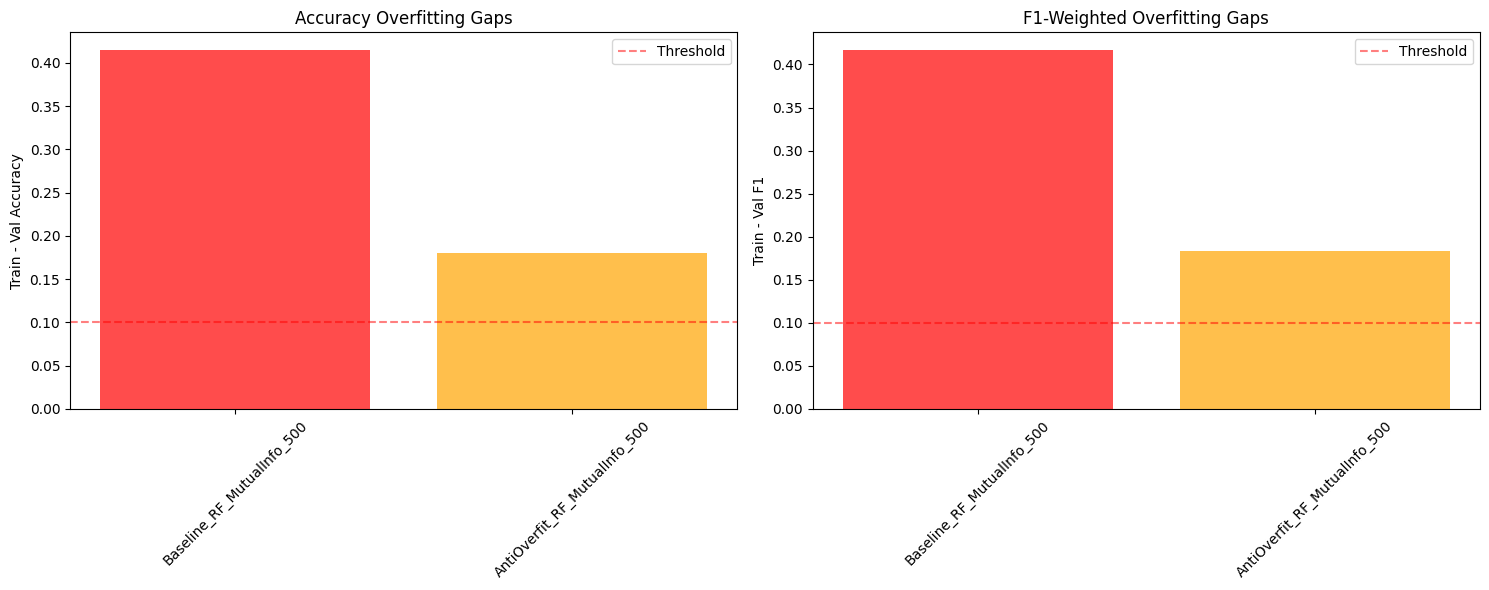

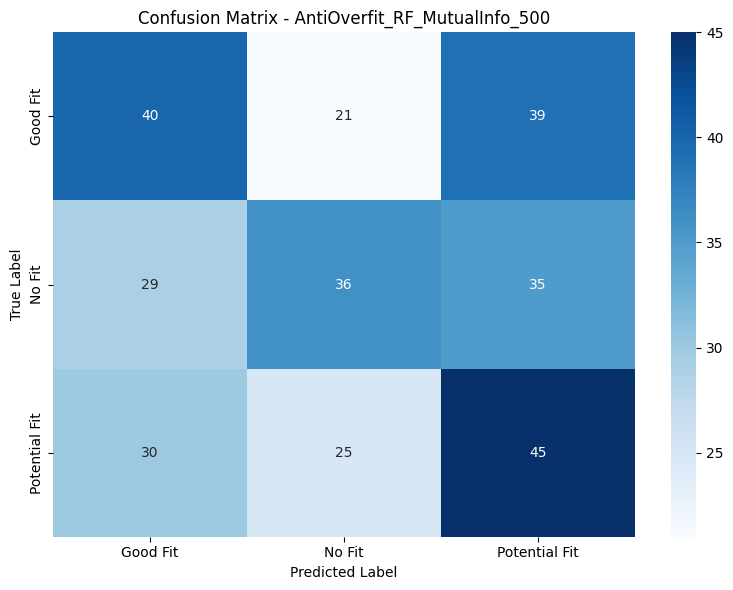

Experiment saved to ../models/trained/RandomForest/AntiOverfit_RF_MutualInfo_500.pkl


In [21]:

# evaluation function to standardise model evaluation
anti_overfit_eval_results = evaluate(
    model = anti_overfit_rf,
    model_name = anti_overfit_name,
    evaluator = evaluator,
    X_train = X_train,
    y_train = y_train,
    X_val = X_val,
    y_val = y_val,
    X_test = X_test,
    y_test = y_test
)

experiment_name = anti_overfit_name

anti_overfit_experiment = {
    "experiment_name" : experiment_name,
    "model" : anti_overfit_rf,
    "train_results" : anti_overfit_train_results,
    "eval_results" : anti_overfit_eval_results
}

save_experiment(anti_overfit_experiment, f"{experiment_name}.pkl")

## High Performance

### High Perfomance Training

In [22]:
param_space = {
    'n_estimators': (400, 1000),        # Increased for better performance
    'max_depth': (10, 20),              # Deeper for text classification
    'min_samples_split': (5, 25),       # More conservative to prevent overfitting
    'min_samples_leaf': (2, 10),        # Increased minimum from 1 to 2
    'max_features': [0.3, 0.5, 0.7, 'sqrt', 'log2'],  # Added 'log2', removed 0.8
    'class_weight': [None, 'balanced'],  # Important for fairness
    'random_state': [42]                 # Consistency
}

# Create baseline RandomForest with default parameters
rf = RandomForestModel(random_state=42)

rf_name = f"HighPerformance_RF_{selector_name}"

rf_train_results = train(
        model = rf, 
        model_name = rf_name, 
        trainer = trainer,
        X_train = X_train, 
        y_train = y_train, 
        X_val = X_val, 
        y_val = y_val, 
        optimize = True,
        param_space= param_space
)

[I 2025-06-20 14:23:58,625] A new study created in memory with name: no-name-fc25e5f6-7a77-4200-9aa3-617decbb3e78


🎯 Training HighPerformance_RF_MutualInfo_500 with Bayesian Optimization...
   Features: 500 (chi-squared selected)
   Parameter space: 7 hyperparameters
   Optimization trials: 75
🚀 Training HighPerformance_RF_MutualInfo_500...
🔍 Optimizing HighPerformance_RF_MutualInfo_500 hyperparameters...


  0%|          | 0/75 [00:00<?, ?it/s]

[I 2025-06-20 14:24:08,762] Trial 0 finished with value: 0.5710000000000001 and parameters: {'n_estimators': 625, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'class_weight': None, 'random_state': 42}. Best is trial 0 with value: 0.5710000000000001.
[I 2025-06-20 14:28:59,662] Trial 1 finished with value: 0.5903333333333334 and parameters: {'n_estimators': 982, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 0.7, 'class_weight': None, 'random_state': 42}. Best is trial 1 with value: 0.5903333333333334.
[I 2025-06-20 14:29:03,400] Trial 2 finished with value: 0.5469999999999999 and parameters: {'n_estimators': 575, 'max_depth': 14, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': 'log2', 'class_weight': None, 'random_state': 42}. Best is trial 1 with value: 0.5903333333333334.
[I 2025-06-20 14:31:56,705] Trial 3 finished with value: 0.5833333333333334 and parameters: {'n_estimators': 970, 'max_dep

### High Performance Evaluation


📊 Running comprehensive evaluation...
📊 Evaluating HighPerformance_RF_MutualInfo_500...
✅ Evaluation completed for HighPerformance_RF_MutualInfo_500
   Train Acc: 0.9923, F1: 0.9923
   Val Acc: 0.6208, F1: 0.6170 (max gap: 0.3753)
   Test Acc: 0.4400, F1: 0.4385

📋 DETAILED EVALUATION REPORT: HighPerformance_RF_MutualInfo_500
📊 PERFORMANCE SUMMARY:
   TRAIN : Acc=0.9923, F1-W=0.9923, F1-M=0.9923
   VAL   : Acc=0.6208, F1-W=0.6170, F1-M=0.6170
   TEST  : Acc=0.4400, F1-W=0.4385, F1-M=0.4385

⚠️  OVERFITTING ANALYSIS:
   Severity: severe
   Max Gap: 0.3753
   accuracy_gap: 0.3715
   f1_weighted_gap: 0.3753

🎯 PER-CLASS PERFORMANCE (Test Set):
   Good Fit    : F1=0.3704, P=0.3933, R=0.3500
   No Fit      : F1=0.5490, P=0.5385, R=0.5600
   Potential Fit: F1=0.3961, P=0.3832, R=0.4100

🔍 FEATURE IMPORTANCE (tree_importance):
   Top 5 indices: [203   0 426  16 156]
   Mean importance: 0.0020
   Std importance: 0.0015

📊 CLASSIFICATION REPORT SUMMARY:
   Macro Avg: F1=0.4385, P=0.4383, R=0.4

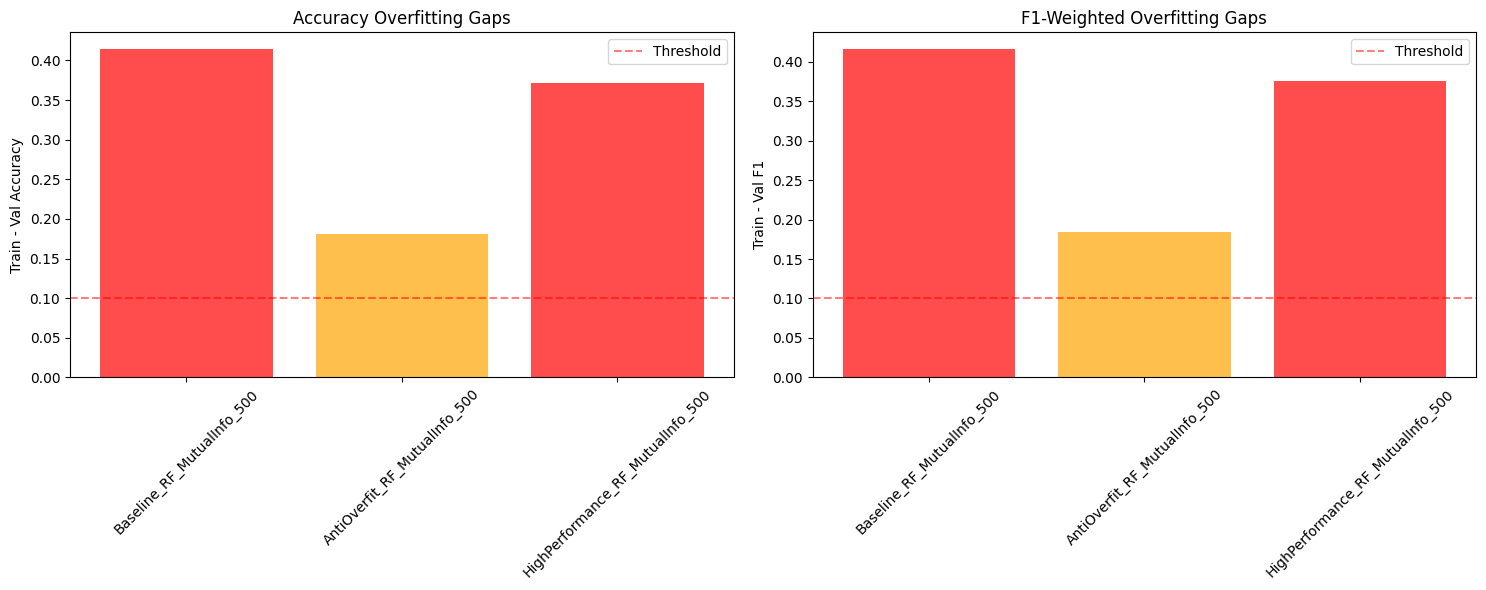

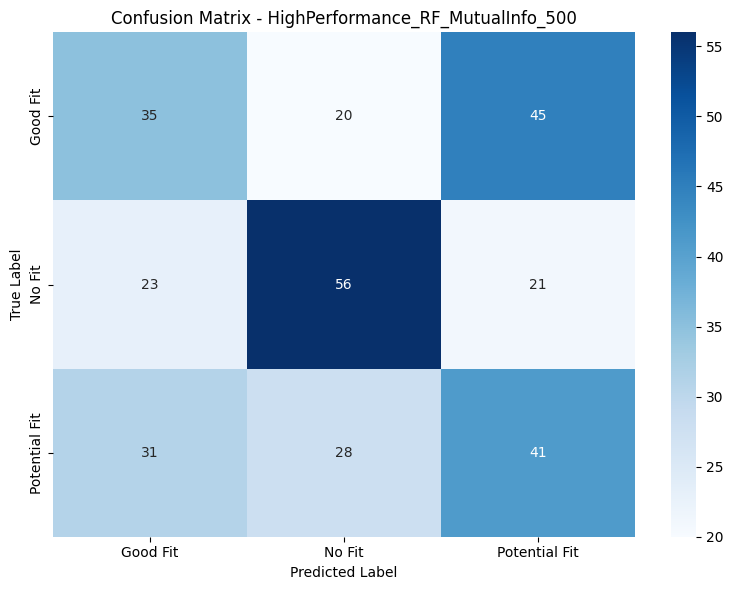

Experiment saved to ../models/trained/RandomForest/HighPerformance_RF_MutualInfo_500.pkl


In [23]:
# evaluation function to standardise model evaluation
rf_eval_results = evaluate(
    model = rf,
    model_name = rf_name,
    evaluator = evaluator,
    X_train = X_train,
    y_train = y_train,
    X_val = X_val,
    y_val = y_val,
    X_test = X_test,
    y_test = y_test
)

experiment_name = rf_name

rf_experiment = {
    "experiment_name" : experiment_name,
    "model" : rf,
    "train_results" : rf_train_results,
    "eval_results" : rf_eval_results
}

save_experiment(rf_experiment, f"{experiment_name}.pkl")

## Balanced

### Balanced Model Training

In [24]:
balanced_space = {
    'n_estimators': (150, 400),                    # Increased for better stability
    'max_depth': (8, 15),                          # Deeper for text patterns
    'min_samples_split': (8, 30),                  # More flexible splitting
    'min_samples_leaf': (3, 15),                   # Reduced for better learning
    'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],  # More granular options
    'criterion': ['gini', 'entropy'],              # Keep both criteria
    'class_weight': [None, 'balanced'],            # Added for fairness
    'random_state': [42]                           # Added for consistency
}

# Create baseline RandomForest with default parameters
rf = RandomForestModel(random_state=42)

rf_name = f"Balanced_RF_{selector_name}"

rf_train_results = train(
        model = rf, 
        model_name = rf_name, 
        trainer = trainer,
        X_train = X_train, 
        y_train = y_train, 
        X_val = X_val, 
        y_val = y_val, 
        optimize = True,
        param_space= param_space
)

[I 2025-06-20 17:45:10,189] A new study created in memory with name: no-name-548a80c3-8464-4519-9ba9-a9e025111cd7


🎯 Training Balanced_RF_MutualInfo_500 with Bayesian Optimization...
   Features: 500 (chi-squared selected)
   Parameter space: 7 hyperparameters
   Optimization trials: 75
🚀 Training Balanced_RF_MutualInfo_500...
🔍 Optimizing Balanced_RF_MutualInfo_500 hyperparameters...


  0%|          | 0/75 [00:00<?, ?it/s]

[I 2025-06-20 17:45:20,860] Trial 0 finished with value: 0.5710000000000001 and parameters: {'n_estimators': 625, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'class_weight': None, 'random_state': 42}. Best is trial 0 with value: 0.5710000000000001.
[I 2025-06-20 17:50:10,647] Trial 1 finished with value: 0.5903333333333334 and parameters: {'n_estimators': 982, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 0.7, 'class_weight': None, 'random_state': 42}. Best is trial 1 with value: 0.5903333333333334.
[I 2025-06-20 17:50:14,511] Trial 2 finished with value: 0.5469999999999999 and parameters: {'n_estimators': 575, 'max_depth': 14, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': 'log2', 'class_weight': None, 'random_state': 42}. Best is trial 1 with value: 0.5903333333333334.
[I 2025-06-20 17:53:07,550] Trial 3 finished with value: 0.5833333333333334 and parameters: {'n_estimators': 970, 'max_dep

KeyboardInterrupt: 

### Balanced Model Evaluation

In [ ]:
# evaluation function to standardise model evaluation
rf_eval_results = evaluate(
    model = rf,
    model_name = rf_name,
    evaluator = evaluator,
    X_train = X_train,
    y_train = y_train,
    X_val = X_val,
    y_val = y_val,
    X_test = X_test,
    y_test = y_test
)

experiment_name = rf_name

rf_experiment = {
    "experiment_name" : experiment_name,
    "model" : rf,
    "train_results" : rf_train_results,
    "eval_results" : rf_eval_results
}

save_experiment(rf_experiment, f"{experiment_name}.pkl")

[I 2025-06-20 12:47:11,117] A new study created in memory with name: no-name-97a15797-a32a-4f17-8088-3b64ead36f99



🚀 Optimizing best feature selection...
🚀 Training Optimized_MutualInfo_500...
🔍 Optimizing Optimized_MutualInfo_500 hyperparameters...


  0%|          | 0/75 [00:00<?, ?it/s]

[I 2025-06-20 12:47:20,956] Trial 0 finished with value: 0.5660000000000001 and parameters: {'n_estimators': 487, 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5660000000000001.
[I 2025-06-20 12:48:36,714] Trial 1 finished with value: 0.5833333333333334 and parameters: {'n_estimators': 601, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 0.4}. Best is trial 1 with value: 0.5833333333333334.
[I 2025-06-20 12:49:41,733] Trial 2 finished with value: 0.5846666666666667 and parameters: {'n_estimators': 452, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 0.4}. Best is trial 2 with value: 0.5846666666666667.
[I 2025-06-20 12:52:13,816] Trial 3 finished with value: 0.5843333333333334 and parameters: {'n_estimators': 528, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 0.8}. Best is trial 2 with value: 0.5846666666666667.
[I 2

KeyboardInterrupt: 

## Model Comparisons

In [ ]:
# Compare all models
comparison_df = evaluator.compare_models()


🏆 MODEL EVALUATION COMPARISON (sorted by Test_F1):
                            Model  Train_Acc  Train_F1  Val_Acc  Val_F1 Overfit_Severity  Max_Gap  Test_Acc  Test_F1
       Baseline_RF_MutualInfo_500     0.9997    0.9997   0.5850  0.5832           severe   0.4165    0.4867   0.4856
HighPerformance_RF_MutualInfo_500     0.9923    0.9923   0.6208  0.6170           severe   0.3753    0.4400   0.4385
    AntiOverfit_RF_MutualInfo_500     0.7680    0.7644   0.5875  0.5807             high   0.1837    0.4033   0.4029
